In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils

In [2]:
data = pd.read_csv('data/athlete_cleaned.csv')
data_short = pd.read_csv('data/athlete_cleaned_short.csv')

In [3]:
data

,gender,event,medal,type,year,country,abb,athlete
0,Men,Double FITA Round Amputee,Gold,Archery,1980,Denmark,DEN,LARSEN Finn
1,Men,Double FITA Round Paraplegic,Gold,Archery,1980,FR Germany,FRG,GEISS H.
2,Men,Double FITA Round Tetraplegic,Gold,Archery,1980,Canada,CAN,PARKER T.
3,Men,Double FITA Round Novice Paraplegic,Gold,Archery,1980,Mexico,MEX,CHAVEZ Alfredo
4,Men,Double FITA Round Novice Tetraplegic,Gold,Archery,1980,Finland,FIN,KARKAINEN K.
...,...,...,...,...,...,...,...,...
19542,Women,Sitting Volleyball,Bronze,Volleyball,2016,Brazil,BRA,DE ALMEIDA SILVA Nurya
19543,Women,Sitting Volleyball,Bronze,Volleyball,2016,Brazil,BRA,DE OLIVEIRA DIAS Edwarda
19544,Women,Sitting Volleyball,Bronze,Volleyball,2016,Brazil,BRA,MARIA LEIRIA DE CASTRO Camila
19545,Women,Sitting Volleyball,Bronze,Volleyball,2016,Brazil,BRA,PEREIRA Pamela


In [4]:
data_short

,gender,medal,type,year,country,abb
0,Men,Gold,Archery,1980,Denmark,DEN
1,Men,Gold,Archery,1980,FR Germany,FRG
2,Men,Gold,Archery,1980,Canada,CAN
3,Men,Gold,Archery,1980,Mexico,MEX
4,Men,Gold,Archery,1980,Finland,FIN
...,...,...,...,...,...,...
19542,Women,Bronze,Volleyball,2016,Brazil,BRA
19543,Women,Bronze,Volleyball,2016,Brazil,BRA
19544,Women,Bronze,Volleyball,2016,Brazil,BRA
19545,Women,Bronze,Volleyball,2016,Brazil,BRA


In [5]:
data.describe(include='all')

,gender,event,medal,type,year,country,abb,athlete
count,19547,19547,19547,19547,19547.000000,19547,19547,19547
unique,4,1670,3,11,NaN,114,117,6797
top,Men,Tournament,Gold,Athletics,NaN,United States of America,USA,-
freq,11982,450,6611,7713,NaN,1901,1901,60
mean,NaN,NaN,NaN,NaN,1996.723385,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,11.300594,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1996.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN


In [6]:
data.dtypes

gender     object
event      object
medal      object
type       object
year        int64
country    object
abb        object
athlete    object
dtype: object

In [7]:
for c in data.columns:
    if data[c].dtype == 'O':
        data[c] = data[c].astype('category')

In [8]:
data.columns

Index(['gender', 'event', 'medal', 'type', 'year', 'country', 'abb',
       'athlete'],
      dtype='object')

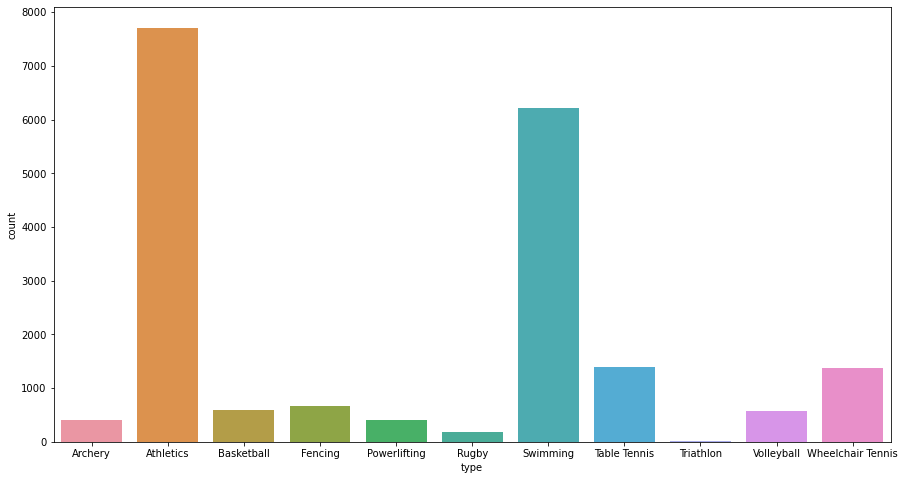

In [9]:
plt.rcParams["figure.figsize"] = (15,8)
ax = sns.countplot(x="type", data=data)

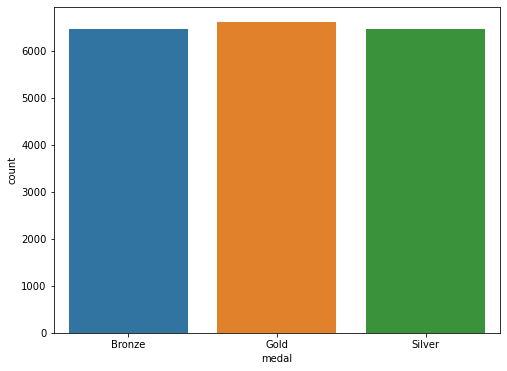

In [10]:
plt.rcParams["figure.figsize"] = (8,6)
ax = sns.countplot(x="medal", data=data)

In [11]:
cols1 = ['type', 'gender', 'athlete']
cols2 = ['type', 'medal', 'athlete']

In [12]:
def getFigureAtPos(**kwargs):
    data = kwargs["data"]
    plotFunc = kwargs["plotFunc"]
    i = kwargs["i"]
    j = kwargs["j"]
    title = kwargs["title"]
    try:
        cols = kwargs["cols"]
        plotFunc(data[cols[i]],hue=data[cols[j]]).set(ylabel=None,xlabel=None,title=title)
    except:
        try:
            cols1 = kwargs["cols1"]
            cols2 = kwargs["cols2"]
            plotFunc(x=data[cols1[i]],y=data[cols2[j]]).set(title=title)
        except:    
            pass

C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


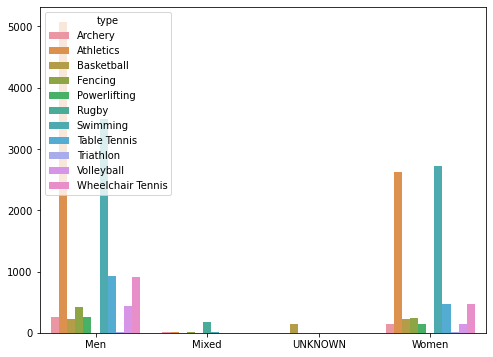

In [13]:
getFigureAtPos(**{
    'plotFunc':sns.countplot,
    'data':data,
    'cols':cols1,
    'j':0,
    'i':1,
    'title':''})

C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


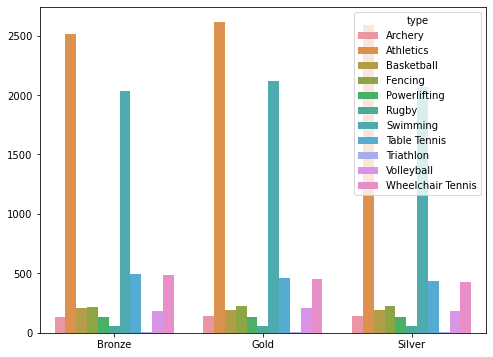

In [14]:
getFigureAtPos(**{
    'plotFunc':sns.countplot,
    'data':data,
    'cols':cols2,
    'j':0,
    'i':1,
    'title':''})

In [15]:
data_year = data['year'].unique()
print(data_year)

[1980 1984 1988 1992 1996 2000 2004 2008 2012 2016]


C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


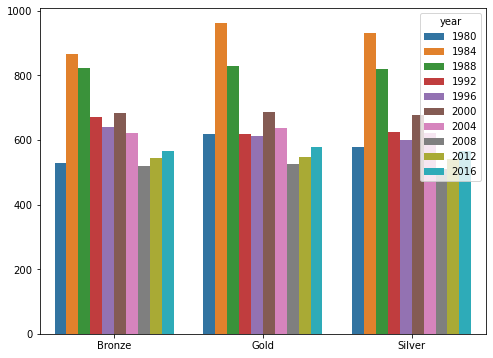

In [16]:
cols3 = ['year', 'medal', 'athlete']
getFigureAtPos(**{
    'plotFunc':sns.countplot,
    'data':data,
    'cols':cols3,
    'j':0,
    'i':1,
    'title':''})    

C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


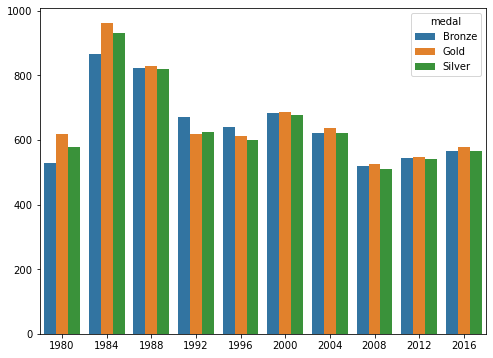

In [17]:
cols4 = ['medal', 'year']
getFigureAtPos(**{
    'plotFunc':sns.countplot,
    'data':data,
    'cols':cols4,
    'j':0,
    'i':1,
    'title':''})  

## K-mean

In [106]:
medal_by_country = pd.read_csv('data/medal_by_country.csv')
medal_by_sport = pd.read_csv('data/medal_by_sport.csv')

(<AxesSubplot:xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

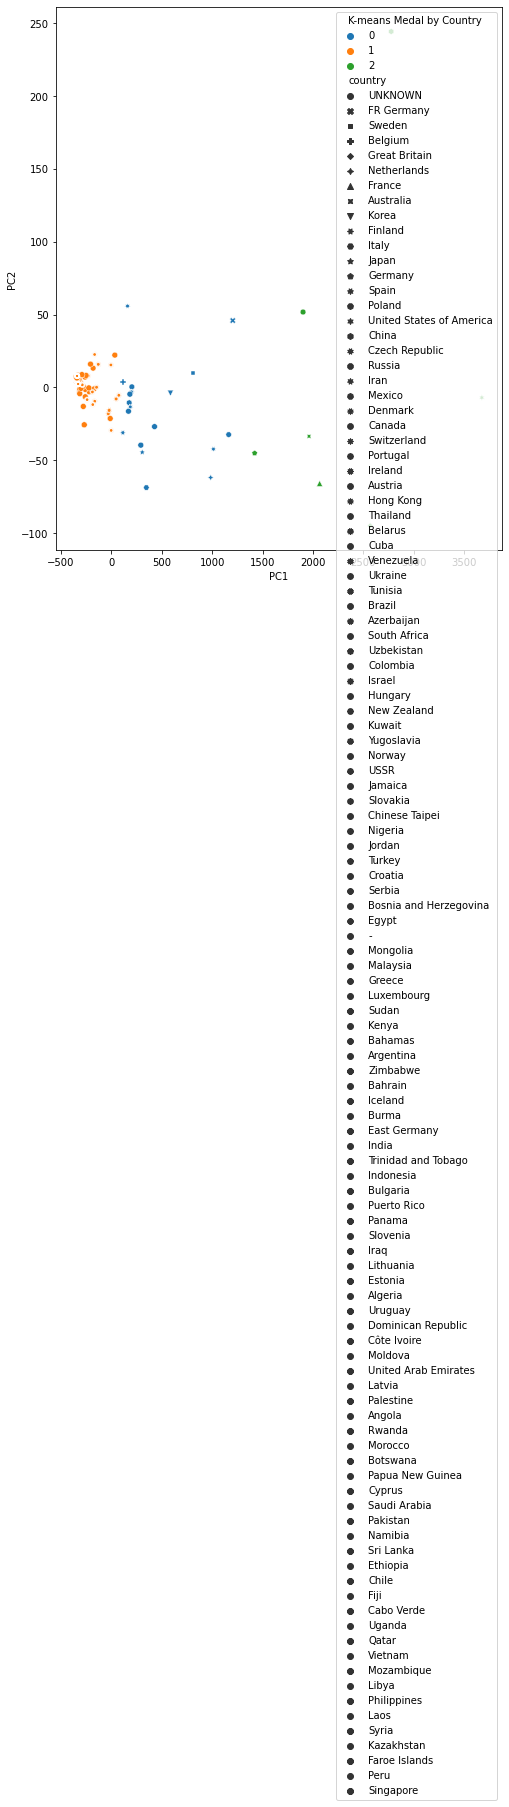

In [62]:
plt.rcParams["figure.figsize"] = (8,10)
medal_by_country0 = medal_by_country.drop(columns=["country"])
cls = KMeans(n_clusters=3, init="random")
cls.fit(medal_by_country0)
labels_country = pd.Series(cls.labels_, name="K-means Medal by Country")
utils.scatterplot_pca(data=medal_by_country0, hue=labels_country, style=medal_by_country.country)

(<AxesSubplot:xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

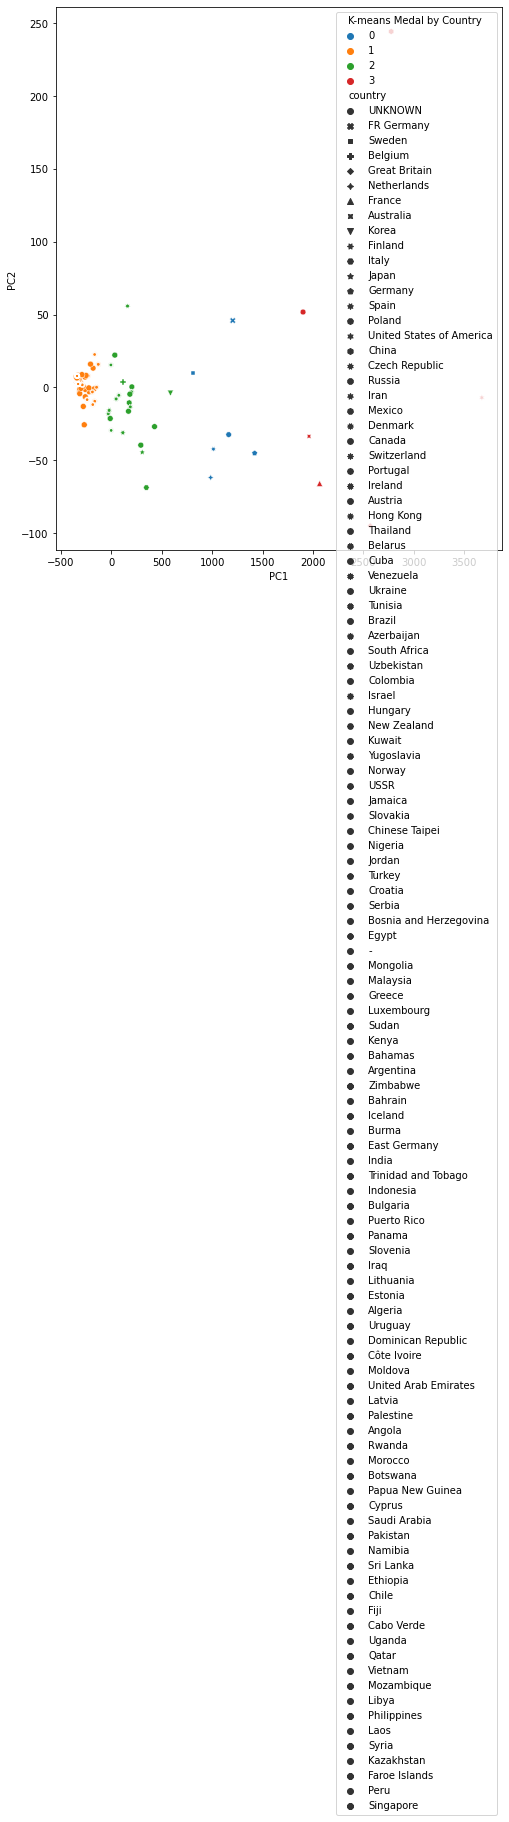

In [63]:
plt.rcParams["figure.figsize"] = (8,10)
medal_by_country0 = medal_by_country.drop(columns=["country"])
cls = KMeans(n_clusters=4, init="random")
cls.fit(medal_by_country0)
labels_country = pd.Series(cls.labels_, name="K-means Medal by Country")
utils.scatterplot_pca(data=medal_by_country0, hue=labels_country, style=medal_by_country.country)

(<AxesSubplot:xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

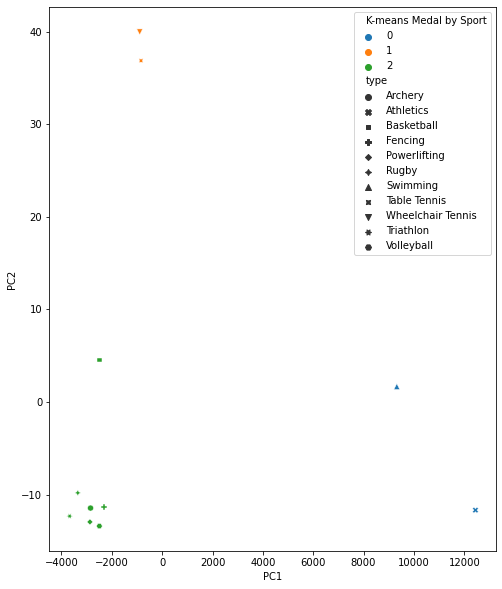

In [60]:
plt.rcParams["figure.figsize"] = (8,10)
medal_by_sport0 = medal_by_sport.drop(columns=["type"])
cls = KMeans(n_clusters=3, init="random")
cls.fit(medal_by_sport0)
labels_sport = pd.Series(cls.labels_, name="K-means Medal by Sport")
utils.scatterplot_pca(data=medal_by_sport0, hue=labels_sport, style=medal_by_sport.type)

(<AxesSubplot:xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

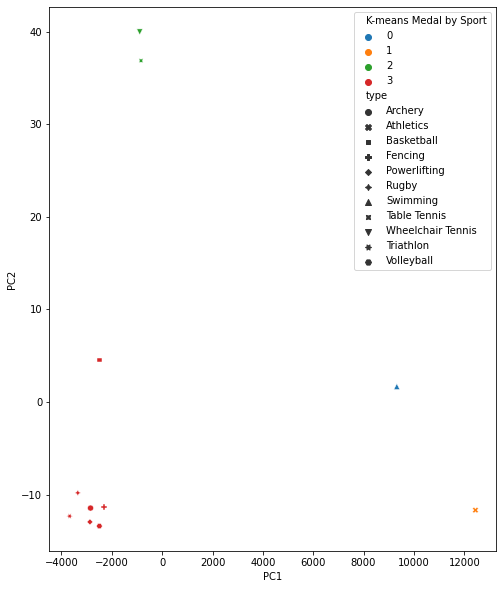

In [61]:
plt.rcParams["figure.figsize"] = (8,10)
medal_by_sport0 = medal_by_sport.drop(columns=["type"])
cls = KMeans(n_clusters=4, init="random")
cls.fit(medal_by_sport0)
labels_sport = pd.Series(cls.labels_, name="K-means Medal by Sport")
utils.scatterplot_pca(data=medal_by_sport0, hue=labels_sport, style=medal_by_sport.type)

---------

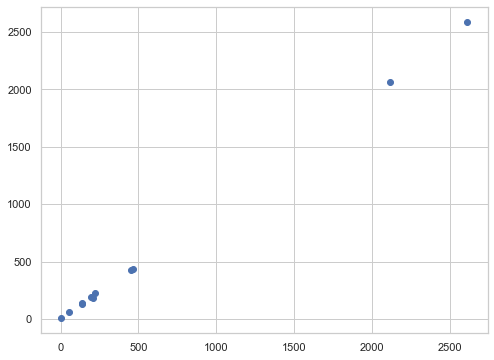

In [115]:
plt.rcParams["figure.figsize"] = (8,6)
plt.scatter(medal_by_sport.gold, medal_by_sport.silver)

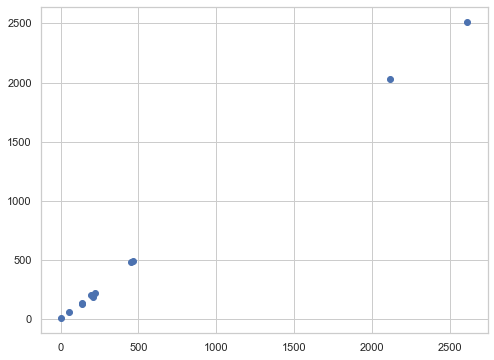

In [116]:
plt.rcParams["figure.figsize"] = (8,6)
plt.scatter(medal_by_sport.gold, medal_by_sport.bronze)

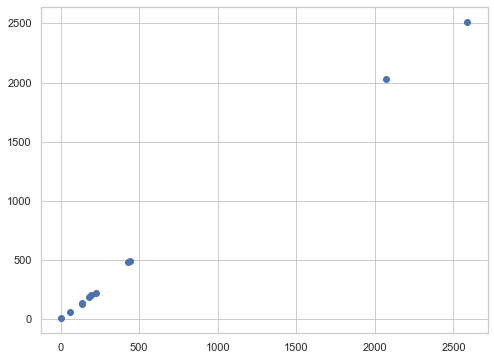

In [118]:
plt.rcParams["figure.figsize"] = (8,6)
plt.scatter(medal_by_sport.silver, medal_by_sport.bronze)

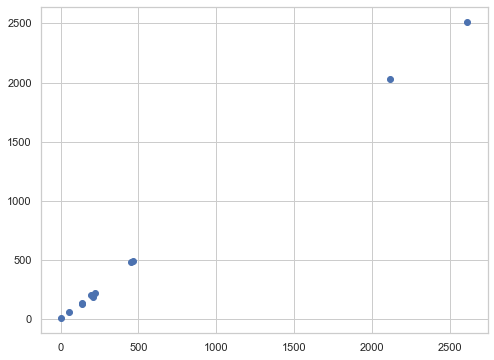

In [119]:
plt.rcParams["figure.figsize"] = (8,6)
plt.scatter(medal_by_sport.gold, medal_by_sport.bronze)

                 type  gold  silver  bronze  total
0             Archery   140     139     136    834
1           Athletics  2613    2588    2512  15527
2          Basketball   195     192     207   1176
3             Fencing   222     228     220   1342
4        Powerlifting   136     136     131    811
5               Rugby    56      60      60    348
6            Swimming  2119    2068    2033  12526
7        Table Tennis   463     439     491   2758
8   Wheelchair Tennis   454     430     486   2708
9           Triathlon     6       6       6     36
10         Volleyball   207     184     184   1173


<AxesSubplot:xlabel='type', ylabel='total'>

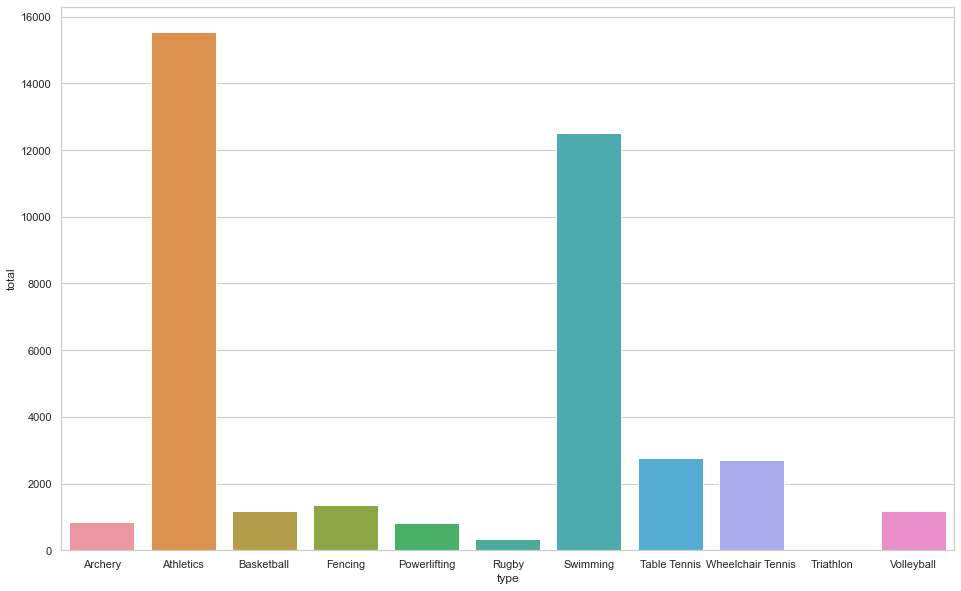

In [92]:
plt.rcParams["figure.figsize"] = (16,10)
print(medal_by_sport)
sns.barplot(x="type", y="total", data=medal_by_sport)

<AxesSubplot:xlabel='type', ylabel='amount'>

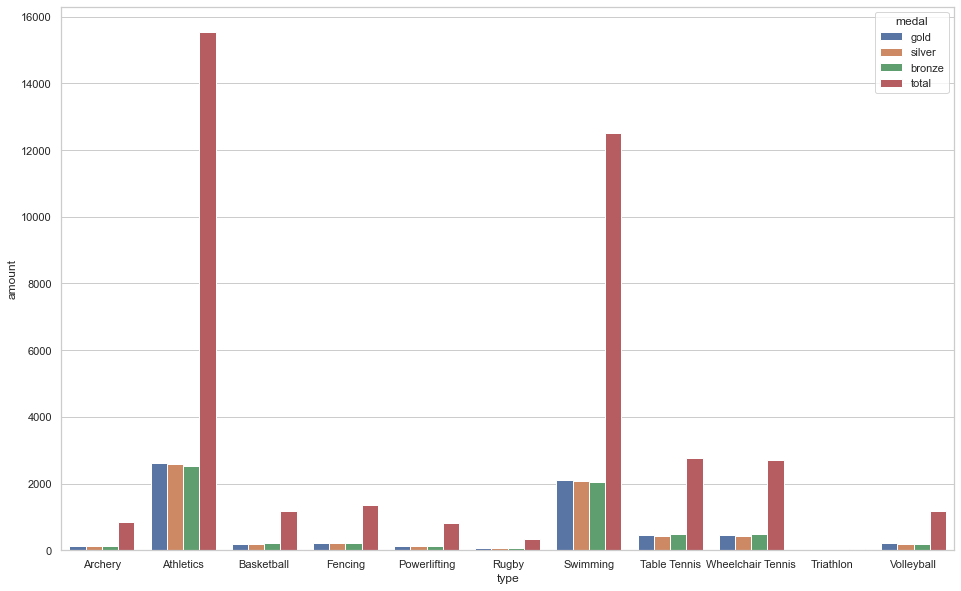

In [120]:
plt.rcParams["figure.figsize"] = (16,10)
medal_by_sport_melt = medal_by_sport.melt(id_vars=["type"], var_name="medal",value_name="amount")
sns.barplot(x="type", y="amount", hue="medal", data=medal_by_sport_melt)

<AxesSubplot:>

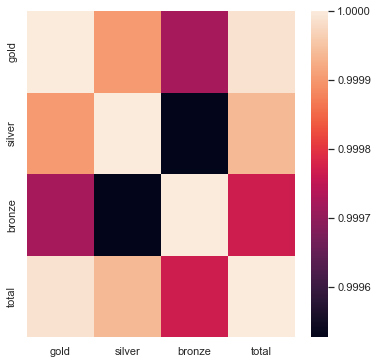

In [122]:
plt.rcParams["figure.figsize"] = (6,6)
sns.heatmap(medal_by_sport.corr())

-----------------------

## PCA

In [147]:
features = ['gold', 'silver', 'bronze', 'total']
# Separating out the features
x = medal_by_sport.loc[:, features].values
# Separating out the target
y = medal_by_sport.loc[:,['type']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [135]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

    principal component 1  principal component 2
0               -1.088585              -0.013633
1                4.748327              -0.014536
2               -0.946980               0.005212
3               -0.885118              -0.013891
4               -1.098087              -0.015430
5               -1.280159              -0.011851
6                3.554732               0.002506
7               -0.310152               0.043835
8               -0.328861               0.047485
9               -1.405995              -0.014613
10              -0.959122              -0.015085


In [138]:
finalDf = pd.concat([principalDf, medal_by_sport[['type']]], axis = 1)
print(finalDf)

    principal component 1  principal component 2               type
0               -1.088585              -0.013633            Archery
1                4.748327              -0.014536          Athletics
2               -0.946980               0.005212         Basketball
3               -0.885118              -0.013891            Fencing
4               -1.098087              -0.015430       Powerlifting
5               -1.280159              -0.011851              Rugby
6                3.554732               0.002506           Swimming
7               -0.310152               0.043835       Table Tennis
8               -0.328861               0.047485  Wheelchair Tennis
9               -1.405995              -0.014613          Triathlon
10              -0.959122              -0.015085         Volleyball


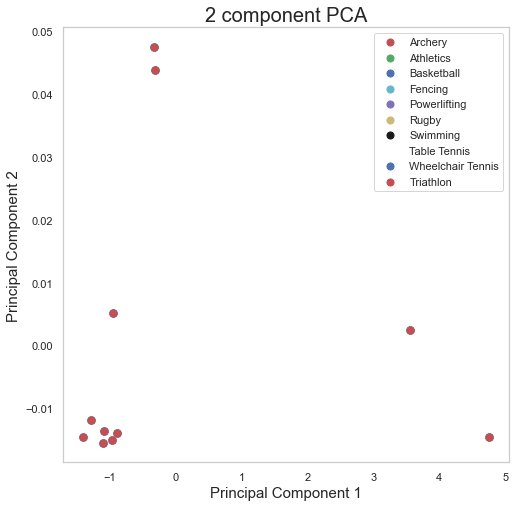

In [146]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
type_sport = ['Archery', 'Athletics', 'Basketball', 'Fencing', 'Powerlifting','Rugby', 'Swimming', 'Table Tennis', 'Wheelchair Tennis','Triathlon', 'Volleyball']
colors = ['r', 'g', 'b','c', 'm', 'y','k', 'w', 'b','r']
for target, color in zip(type_sport,colors):
    indicesToKeep = finalDf['type'] == type_sport
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(type_sport)
ax.grid()